# Transition matrix & 'episodes'
## Construct an adjacency/transition matrix from observing many 'episodes'
Say a graph represents an automata with weights being robabilities  for transition from one state to another.

An `episode` is a sequence of such transitions.

Without knowing true transition weights, we get them by analyzing frequency of transitions in `many` observed episodes.

<i> Case from a book:<br>
Maxim Lapan - Deep Reinforcement Learning Hands-On. Apply modern RL methods to practical problems of chatbots, robotics, discrete optimization, web automation, and more (2nd Edition) </i>

input example : 
>>> arr_T = np.array([[r'\vec{v}_1', r'\vec{v}_2']]).T
>>> print_tex(arr_T,'=', np.arange(1,5).reshape(2,-1)/4, r'; symbols: \otimes, \cdot,\times')
output: 


<IPython.core.display.Math object>

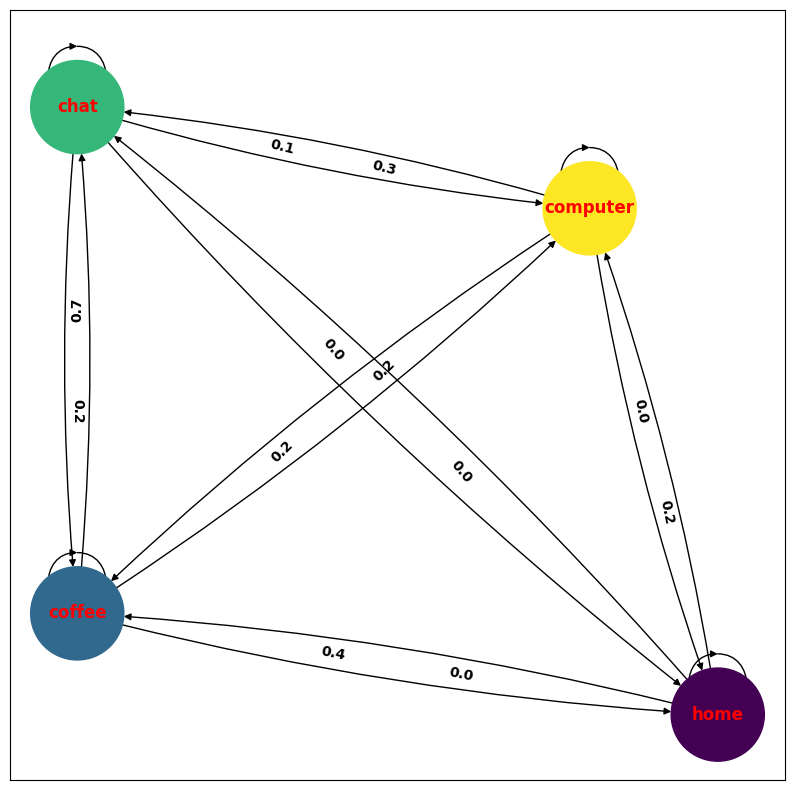

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from misc_tools.print_latex import print_tex

nodes = ['home', 'coffee','chat', 'computer']
edges = [('home'    , 'home', 0.6),('home'      , 'coffee', 0.4),('home'    , 'chat', 0.0),('home'      , 'computer', 0.0),
         ('coffee'  , 'home', 0.0),('coffee'    , 'coffee', 0.1),('coffee'  , 'chat', 0.7),('coffee'    , 'computer', 0.2),
         ('chat'    , 'home', 0.0),('chat'      , 'coffee', 0.2),('chat'    , 'chat', 0.5),('chat'      , 'computer', 0.3),
         ('computer', 'home', 0.2),('computer'  , 'coffee', 0.2),('computer', 'chat', 0.1),('computer'  , 'computer', 0.5),]

pos = {n: np.array(p) for n,p in zip(nodes, ([1,-0.2], [0,0], [0,1],[0.8,0.8]))}

G = nx.DiGraph(name = 'office worker')
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

fig, ax = plt.subplots(figsize=(10,10))
ns = 4500
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,label_pos = 0.4, font_weight='bold')
nx.draw_networkx_nodes( G, pos, node_size = ns, node_color=[i for i,_ in enumerate(G.nodes())])
nx.draw_networkx_labels(G, pos, font_color='red', font_size= 12, font_weight='bold')
nx.draw_networkx_edges( G, pos, connectionstyle = "arc3,rad=0.05", arrows=True, node_size = ns);

<IPython.core.display.Math object>

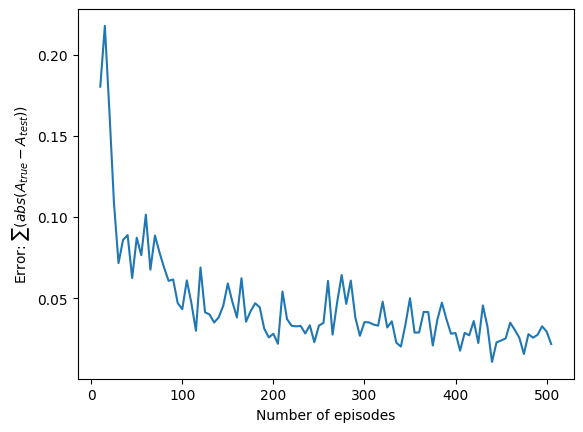

In [2]:
adj_true = nx.adjacency_matrix(G).todense()
id_map = {n:i for i,n in enumerate(nodes)}
num_paths_all = np.arange(10, 510, 5)
sol = []
episode_length = 200

for num_paths in num_paths_all:
    # get paths (transition based on edge weights)
    episodes = nx.generate_random_paths(G, sample_size=num_paths, path_length=episode_length)
    # unpack transition pairs - edges
    episode_edges = [(a,b) for ep in episodes for a,b in zip(ep[:-1],ep[1:])]
    # count occurances of transitions
    counter = dict(Counter(episode_edges))
    # get a normalizing factor (by rows in adjacency/transition matrix)
    edges_from = {n:0 for n in nodes}

    for e,w in counter.items():
        (f,t) = e
        edges_from[f] += w

    # apply normalization
    for e,w in counter.items():
        (f,t) = e
        counter[e] /= edges_from[f]
    # fill transition matrix
    adj_test = np.zeros_like(adj_true)
    for (f,t),w in counter.items():
        adj_test[id_map[f], id_map[t]] = w
    # calculate error
    sol.append(np.sum(np.abs(adj_true - adj_test)))

plt.plot(num_paths_all, sol)
plt.xlabel('Number of episodes')
plt.ylabel(r'Error: $\sum(abs(A_{true} - A_{test}))$')
print_tex(r'A_{True}:', adj_true, r'; \ A_{Test}:', np.round(adj_test,3))